In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)

In [4]:
%pip install lightgbm
from lightgbm import LGBMClassifier

Note: you may need to restart the kernel to use updated packages.


### Model Tahmin 

In [5]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)

In [6]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\sevva\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (def

In [7]:
y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7229437229437229

### Model Tuned

In [8]:
lgbm=LGBMClassifier()

In [9]:
lgbm_params={"learning_rate=":[0.1,0.01,0.01],"n_estimators":[200,500,1000],"max_depth":[2,3,5,8]}

In [10]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate=0.1 will be ignored. Current value: learning_rate=0.1


In [11]:
lgbm_cv_model.best_params_

{'learning_rate=': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [16]:
lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=200).fit(X_train,y_train)

In [17]:
y_pred=lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

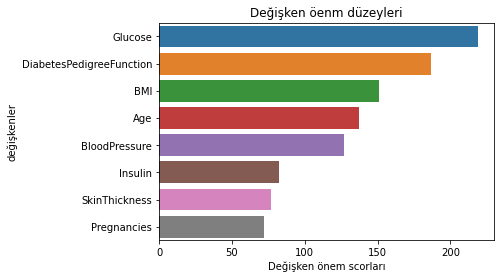

In [18]:
feature_imp=pd.Series(lgbm_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken önem scorları")
plt.ylabel("değişkenler")
plt.title("Değişken öenm düzeyleri")
plt.show()